<a href="https://colab.research.google.com/github/globalepub/228Food/blob/master/MachineLearningTP3_Emefa_KPEGBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<center>TP 3 - Réseau de neurones artificiel</center>**

## **<center>Exercice 1 - Prédiction du prix des maisons</center>**

Il s'agit d'un problème de régression dont l'objectif est de modéliser le prix des maisons en milliers de dollars.

La base de données de maisons comprend 9 attributs numériques, dont 8 attributs d'entrée et 1 attribut cible qui est le prix des maisons a predire.

La performance du modèle sera évaluée à l'aide de l'erreur quadratique moyenne (MSE).

In [ ]:
!pip install scikeras

In [ ]:
#!pip install numpy==1.24.4
!pip uninstall numpy tensorflow keras -y
!pip install numpy>=1.21.0,<1.25.0
!pip install tensorflow>=2.10.0
!pip install scikit-learn pandas seaborn matplotlib

Found existing installation: numpy 2.1.3
Uninstalling numpy-2.1.3:
  Successfully uninstalled numpy-2.1.3
Found existing installation: tensorflow 2.19.0
Uninstalling tensorflow-2.19.0:
  Successfully uninstalled tensorflow-2.19.0
Found existing installation: keras 3.10.0
Uninstalling keras-3.10.0:
  Successfully uninstalled keras-3.10.0
/bin/bash: line 1: 1.25.0: No such file or directory
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.19.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.19.0 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.1.3 which is incompatible.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.0 which is incompatible.
tensorflow-text

In [ ]:
# Importer les librairies nécessaires
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

### **Acquisition des données**

Nous allons importer les donnees de la libraire sklearn

In [ ]:
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing()

# Afficher la description des attributs
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [ ]:
# Transformer les données en dataframe
california = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
california['PRICE'] = california_housing.target
california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### **Analyse des données**

Nous voulons voir s'il y a une correlation entre la variable cible et d'autres variables.
Nous allons faire un seul graphique, mais vous pouvez en faire d'autres

In [ ]:
california.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


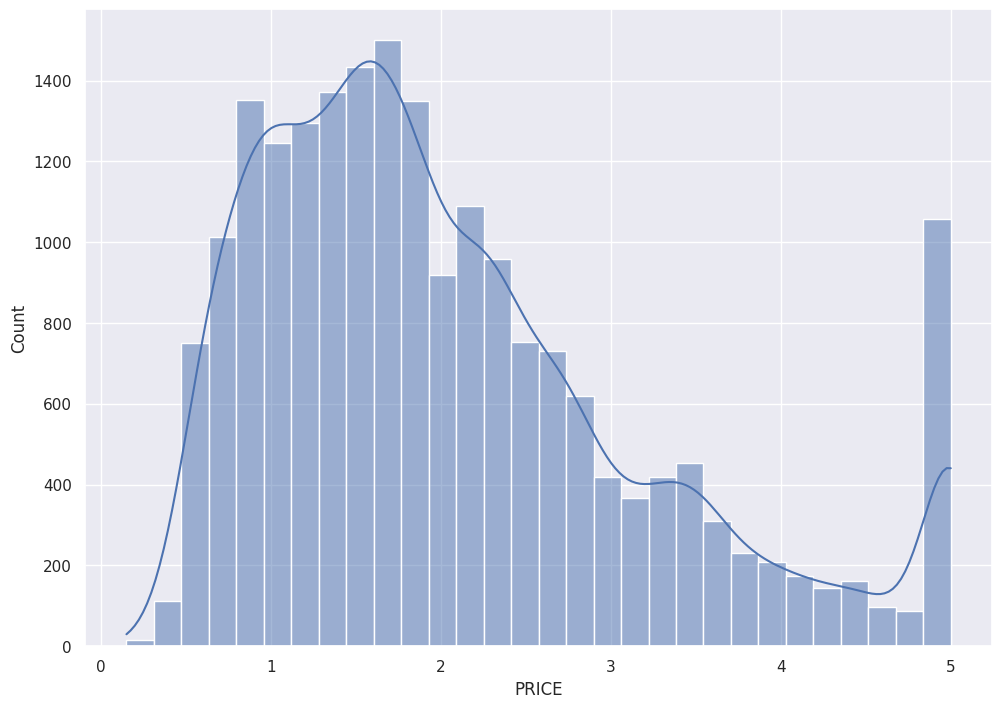

In [ ]:
# Complètez le code suivant pour affichez la distribution des prix des maisons sur un graphique
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(california['PRICE'], bins=30, kde=True)
plt.show()

### **Transformation des données**

In [ ]:
# Complèter le code pour séparer l'ensemble des variables independantes (X) et la variable dependante (Y)
X = california_housing.data
Y = california_housing.target

In [ ]:
# Séparer les sous-ensembles d'entrainement (X_train, Y_train) et les sous-ensembles de test (X_test, Y_test)
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.25,     # 25% pour le test, 75% pour l'entraînement
    random_state=42     # Pour reproduire les mêmes résultats
)

# Vérification des dimensions
print(f"Taille ensemble d'entraînement: X_train {X_train.shape}, Y_train {Y_train.shape}")
print(f"Taille ensemble de test: X_test {X_test.shape}, Y_test {Y_test.shape}")

Taille ensemble d'entraînement: X_train (15480, 8), Y_train (15480,)
Taille ensemble de test: X_test (5160, 8), Y_test (5160,)


In [ ]:
# Normaliser les sous-ensembles d'entrainement
from sklearn.preprocessing import StandardScaler

# Initialiser le scaler
scaler = StandardScaler()

# Normalisation
print("Normalisation en cours...")
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Vérification des résultats
print("\n=== STATISTIQUES AVANT NORMALISATION ===")
print(f"X_train - Min: {X_train.min():.2f}, Max: {X_train.max():.2f}")
print(f"X_train - Moyenne: {X_train.mean():.2f}, Écart-type: {X_train.std():.2f}")

print("\n=== STATISTIQUES APRÈS NORMALISATION ===")
print(f"X_train_scaled - Min: {X_train_scaled.min():.2f}, Max: {X_train_scaled.max():.2f}")
print(f"X_train_scaled - Moyenne: {X_train_scaled.mean():.2f}, Écart-type: {X_train_scaled.std():.2f}")

print(f"\n Normalisation terminée!")
print(f"Forme des données: {X_train_scaled.shape}")

Normalisation en cours...

=== STATISTIQUES AVANT NORMALISATION ===
X_train - Min: -124.35, Max: 35682.00
X_train - Moyenne: 173.21, Écart-type: 624.57

=== STATISTIQUES APRÈS NORMALISATION ===
X_train_scaled - Min: -2.38, Max: 103.74
X_train_scaled - Moyenne: -0.00, Écart-type: 1.00

 Normalisation terminée!
Forme des données: (15480, 8)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(california_housing.data,
                                                    california_housing.target, random_state=11)
print(X_train.shape)
print(X_test.shape)

(15480, 8)
(5160, 8)


**Transformation des données**

In [ ]:
# Séparer les variables indépendantes (X) et la variable dépendante (Y)
X = california_housing.data  # Correction: utiliser .data
Y = california_housing.target  # Correction: utiliser .target

print(f"Forme de X: {X.shape}")
print(f"Forme de Y: {Y.shape}")

# Séparer les sous-ensembles d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

print(f"Taille de l'ensemble d'entraînement: {X_train.shape}")
print(f"Taille de l'ensemble de test: {X_test.shape}")

# Normaliser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Données normalisées avec succès!")
print(f"Moyenne après normalisation: {np.mean(X_train_scaled, axis=0)}")
print(f"Écart-type après normalisation: {np.std(X_train_scaled, axis=0)}")

Forme de X: (20640, 8)
Forme de Y: (20640,)
Taille de l'ensemble d'entraînement: (15480, 8)
Taille de l'ensemble de test: (5160, 8)
Données normalisées avec succès!
Moyenne après normalisation: [-1.16526082e-15 -1.65256841e-16  8.64890273e-15 -1.20910621e-14
 -5.89680472e-17 -4.06050803e-17  7.07835599e-14 -2.67487181e-13]
Écart-type après normalisation: [1. 1. 1. 1. 1. 1. 1. 1.]


### **Construction du modele**

Ci-dessous, nous allons définir plusieurs fonctions pour créer le modèle de base en variant les hyperparametres comme le nombre de couches, le nombre de neurones, le nombre d'iteration, etc.

Le premier est un modèle simple qui a une seule couche cachée entièrement connectée avec le même nombre de neurones que les attributs d'entrée (13). Ce réseau utilise de bonnes pratiques telles que la fonction d'activation du 'relu' pour la couche cachée.
Aucune fonction d'activation n'est utilisée pour la couche de sortie qui a un seul neurone car il s'agit d'un problème de régression et nous nous intéressons à prédire les valeurs numériques directement sans transformation.

**Modèle de base (2 couches : 8 neurones cachés + 1 sortie)**

In [ ]:
# Modèle de base (2 couches : 8 neurones cachés + 1 sortie)
def baseline_model():
    model = Sequential()
    model.add(Dense(8, input_dim=8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

print("\n" + "="*50)
print("MODÈLE DE BASE")
print("="*50)


MODÈLE DE BASE


In [ ]:
# Entraîner le modèle de base
regressor_base = KerasRegressor(model=baseline_model, epochs=100, batch_size=5, verbose=0)
regressor_base.fit(X_train_scaled, Y_train)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


,model,<function bas...x7c32b21ea340>
,build_fn,None
,warm_start,False
,random_state,None
,optimizer,'rmsprop'
,loss,None
,metrics,None
,batch_size,5
,validation_batch_size,None
,verbose,0
,callbacks,None


In [ ]:
# Faire des prédictions
y_pred_base = regressor_base.predict(X_test_scaled)

In [ ]:
# Évaluer la performance
mse_base = mean_squared_error(Y_test, y_pred_base)
rmse_base = np.sqrt(mse_base)
print(f"MSE Modèle de base: {mse_base:.4f}")
print(f"RMSE Modèle de base: {rmse_base:.4f}")

MSE Modèle de base: 0.3607
RMSE Modèle de base: 0.6005


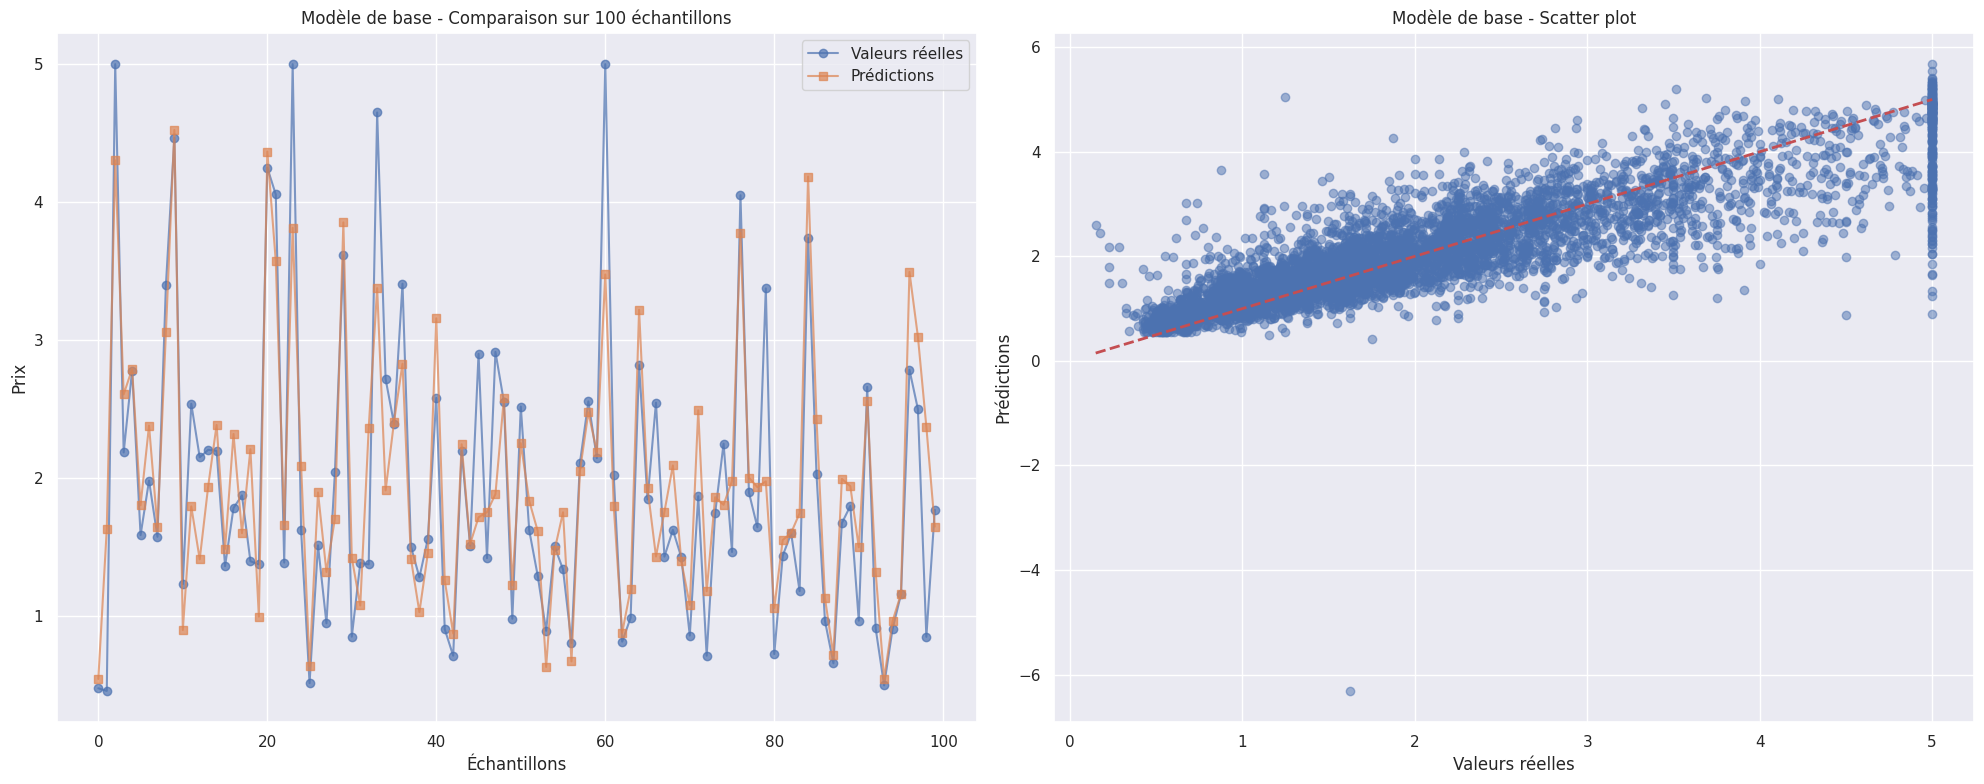

In [ ]:
#Visualiser les resultats dans un diargam
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.plot(Y_test[:100], label="Valeurs réelles", marker='o', alpha=0.7)
plt.plot(y_pred_base[:100], label="Prédictions", marker='s', alpha=0.7)
plt.title('Modèle de base - Comparaison sur 100 échantillons')
plt.xlabel('Échantillons')
plt.ylabel('Prix')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(Y_test, y_pred_base, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.title('Modèle de base - Scatter plot')
plt.tight_layout()
plt.show()

**Modèle plus large (2 couches : 25 neurones cachés + 1 sortie)**

In [ ]:
# La methode suivante crée un réseau de neurones plus large avec 2 couches dont
# une couche cachée de 25 neurones et une couche de sortie d'un seul neurone
def model_large():
    # creer le modele
    model = Sequential()
    model.add(Dense(25, input_dim=8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

print("\n" + "="*50)
print("MODÈLE LARGE")
print("="*50)


MODÈLE LARGE


In [ ]:
# Entraîner le modèle large
regressor_large = KerasRegressor(model=model_large, epochs=100, batch_size=5, verbose=0)
regressor_large.fit(X_train_scaled, Y_train)

# Faire des prédictions
y_pred_large = regressor_large.predict(X_test_scaled)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Evaluer la performance avec la fonction mean_squared_error
mse_large = mean_squared_error(Y_test, y_pred_large)
rmse_large = np.sqrt(mse_large)
print(f"MSE Modèle large: {mse_large:.4f}")
print(f"RMSE Modèle large: {rmse_large:.4f}")

MSE Modèle large: 0.3003
RMSE Modèle large: 0.5480


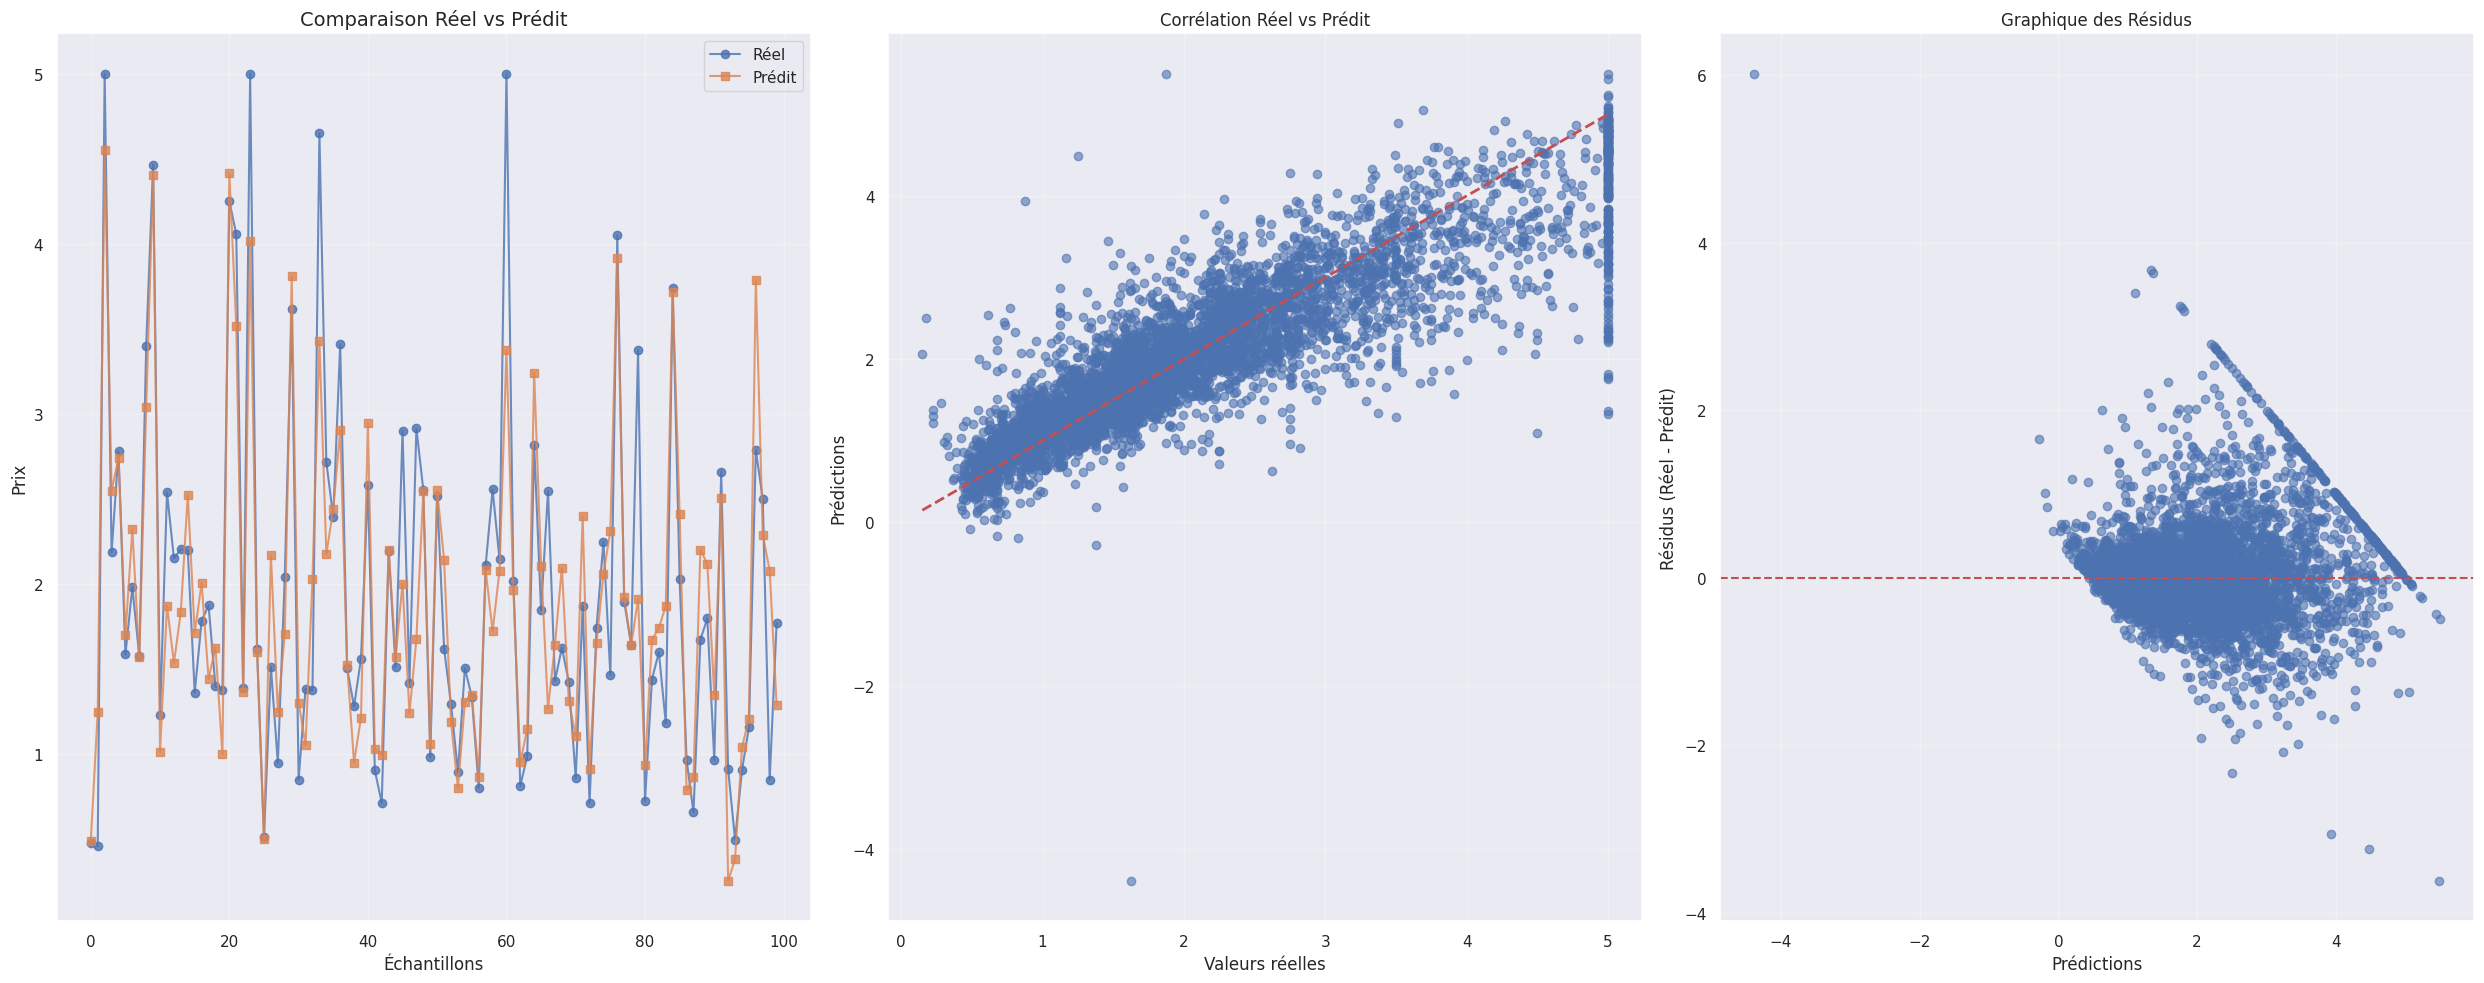

In [ ]:
# Visualiser les resultats dans un diargam de taille (25,10)
# Avec 3 visualisations
plt.figure(figsize=(25, 10))

# Graphique 1: Séries temporelles
plt.subplot(1, 3, 1)
indices = range(100)
plt.plot(indices, Y_test[:100], label="Réel", marker='o', alpha=0.8)
plt.plot(indices, y_pred_large[:100], label="Prédit", marker='s', alpha=0.8)
plt.title('Comparaison Réel vs Prédit', fontsize=14)
plt.xlabel('Échantillons')
plt.ylabel('Prix')
plt.legend()
plt.grid(True, alpha=0.3)

# Graphique 2: Scatter plot
plt.subplot(1, 3, 2)
plt.scatter(Y_test, y_pred_large, alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.title('Corrélation Réel vs Prédit')
plt.grid(True, alpha=0.3)

# Graphique 3: Résidus
plt.subplot(1, 3, 3)
residuals = Y_test - y_pred_large
plt.scatter(y_pred_large, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Prédictions')
plt.ylabel('Résidus (Réel - Prédit)')
plt.title('Graphique des Résidus')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Modèle profond (4 couches: 8, 8, 4 neurones cachés + 1 sortie)**

Un troisième modèle de base plus profond avec 4 couches dont 3 couches cachées de 8, 8 et 4 neurones respectivement et une couche de sortie. Les couches cachées utilisent la fonction d'activation 'relu' tandis que la couche de sortie utilise la fonction d'activation 'linear'

In [ ]:
# La methode suivante crée un réseau de neurones plus profond avec 4 couches dont
# 3 couches cachées de 8, 8 et 4 neurones respectivement et une couche de sortie.
# Les couches cachées utilisent la fonction d'activation 'relu' tandis que la couche de sortie utilise
# la fonction d'activation 'linear'
def model_profond():
    # creer le modele
    model = Sequential()
    model.add(Dense(8, input_dim=8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

print("\n" + "="*50)
print("MODÈLE PROFOND")
print("="*50)


MODÈLE PROFOND


In [ ]:
# Entraîner le modèle profond
regressor_profond = KerasRegressor(model=model_profond, epochs=100, batch_size=5, verbose=0)
regressor_profond.fit(X_train_scaled, Y_train)

# Faire des prédictions
y_pred_profond = regressor_profond.predict(X_test_scaled)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Evaluer la performance avec la fonction mean_squared_error
mse_profond = mean_squared_error(Y_test, y_pred_profond)
rmse_profond = np.sqrt(mse_profond)
print(f"MSE Modèle profond: {mse_profond:.4f}")
print(f"RMSE Modèle profond: {rmse_profond:.4f}")

MSE Modèle profond: 0.3137
RMSE Modèle profond: 0.5601


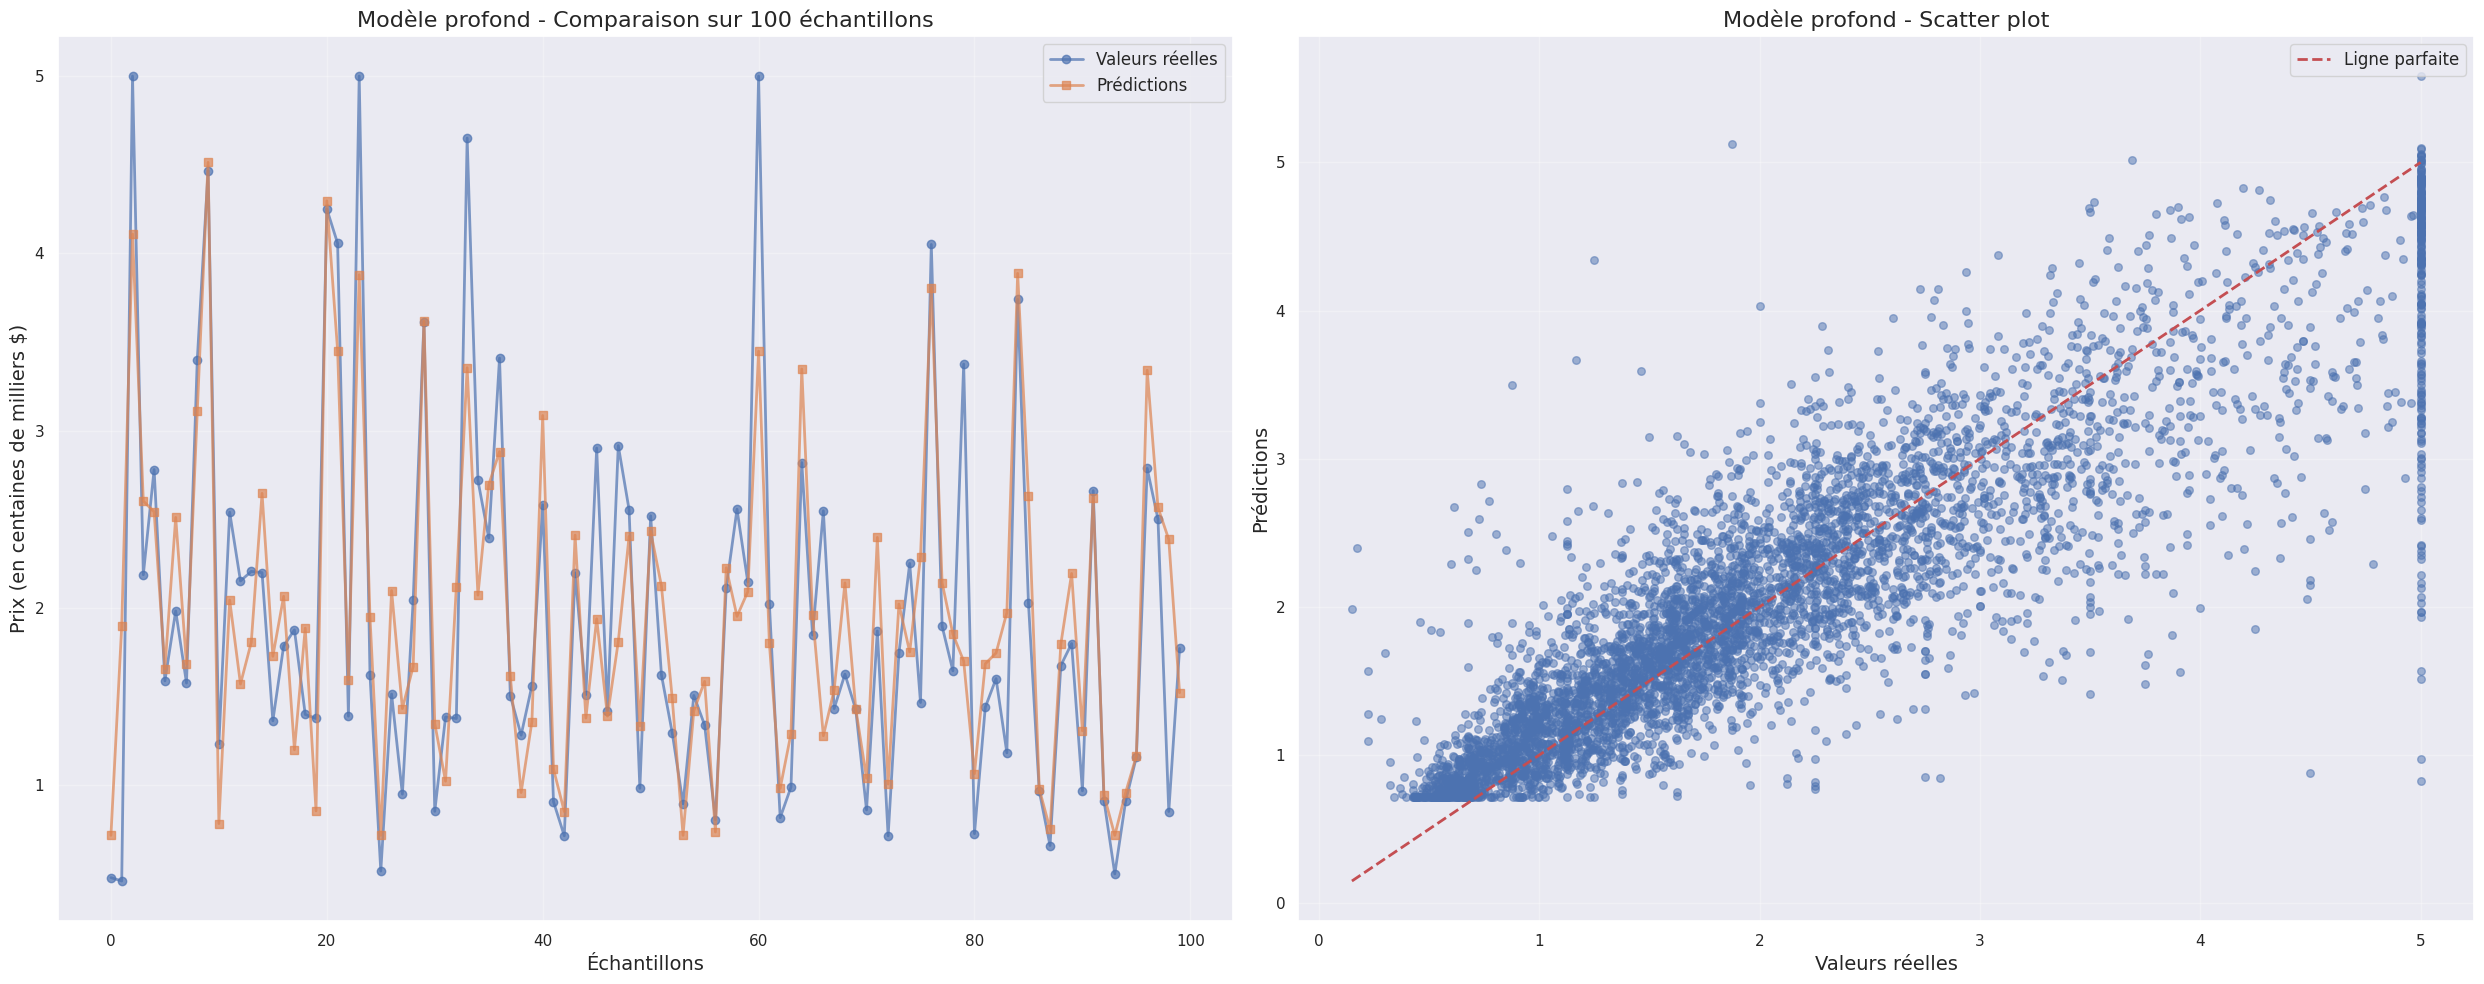

In [ ]:
# Visualiser les resultats dans un diargam de taille (25,10)
plt.figure(figsize=(25, 10))

plt.subplot(1, 2, 1)
plt.plot(Y_test[:100], label="Valeurs réelles", marker='o', alpha=0.7, linewidth=2)
plt.plot(y_pred_profond[:100], label="Prédictions", marker='s', alpha=0.7, linewidth=2)
plt.title('Modèle profond - Comparaison sur 100 échantillons', fontsize=16)
plt.xlabel('Échantillons', fontsize=14)
plt.ylabel('Prix (en centaines de milliers $)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(Y_test, y_pred_profond, alpha=0.5, s=30)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2, label='Ligne parfaite')
plt.xlabel('Valeurs réelles', fontsize=14)
plt.ylabel('Prédictions', fontsize=14)
plt.title('Modèle profond - Scatter plot', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

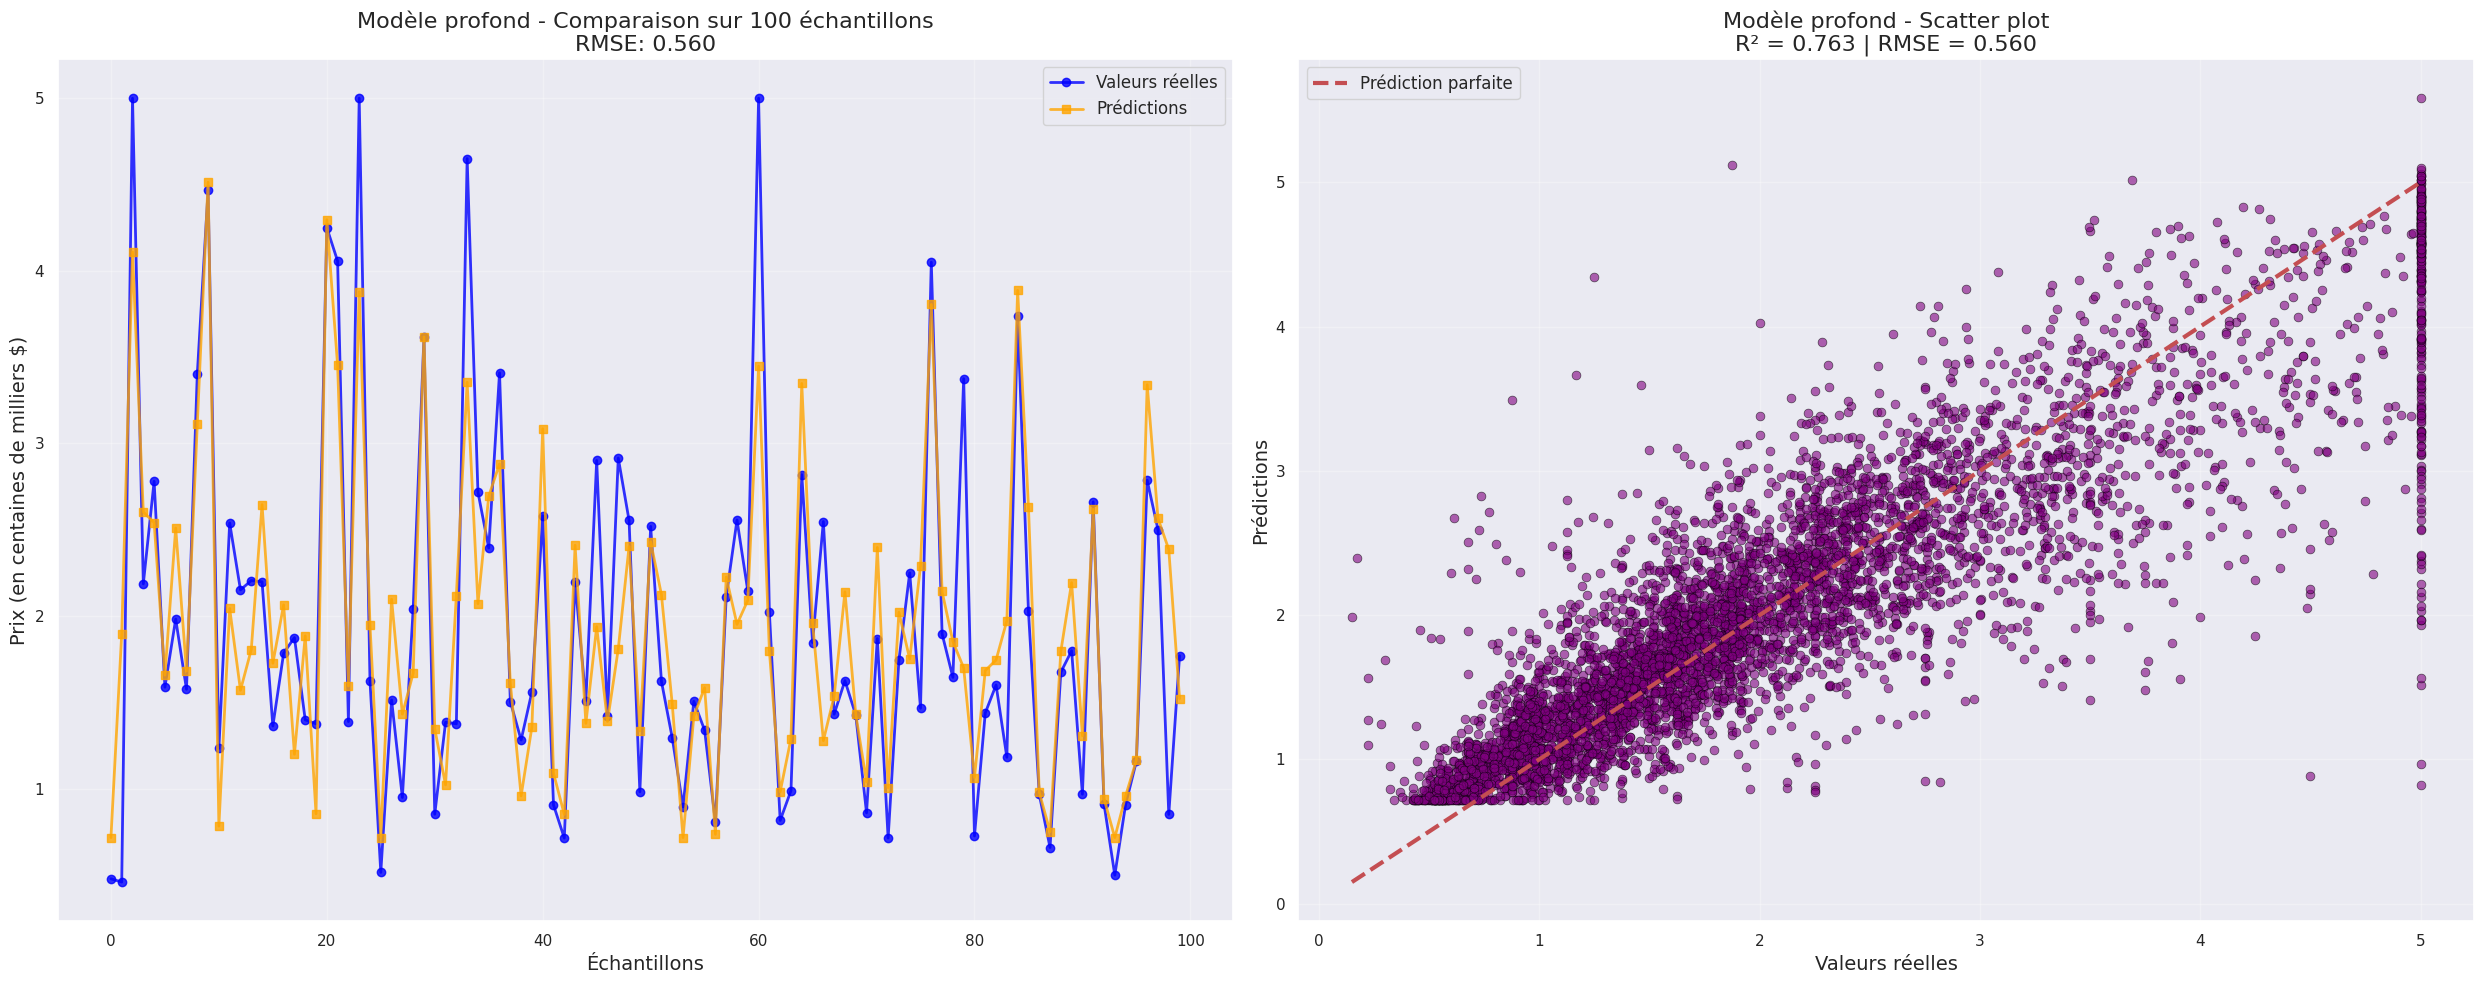

=== MÉTRIQUES MODÈLE PROFOND ===
MSE:  0.3137
RMSE: 0.5601
R²:   0.7629


In [ ]:
# Visualiser les resultats du modèle profond avec métriques
from sklearn.metrics import mean_squared_error, r2_score

# Calculer les métriques pour le modèle profond
mse_profond = mean_squared_error(Y_test, y_pred_profond)
rmse_profond = np.sqrt(mse_profond)
r2_profond = r2_score(Y_test, y_pred_profond)

plt.figure(figsize=(25, 10))

# Graphique 1: Comparaison des valeurs
plt.subplot(1, 2, 1)
plt.plot(Y_test[:100], label="Valeurs réelles", marker='o', alpha=0.8, linewidth=2, markersize=6, color='blue')
plt.plot(y_pred_profond[:100], label="Prédictions", marker='s', alpha=0.8, linewidth=2, markersize=6, color='orange')
plt.title(f'Modèle profond - Comparaison sur 100 échantillons\nRMSE: {rmse_profond:.3f}', fontsize=16)
plt.xlabel('Échantillons', fontsize=14)
plt.ylabel('Prix (en centaines de milliers $)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Graphique 2: Scatter plot avec métriques
plt.subplot(1, 2, 2)
plt.scatter(Y_test, y_pred_profond, alpha=0.6, s=40, c='purple', edgecolors='black', linewidth=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=3, label='Prédiction parfaite')
plt.xlabel('Valeurs réelles', fontsize=14)
plt.ylabel('Prédictions', fontsize=14)
plt.title(f'Modèle profond - Scatter plot\nR² = {r2_profond:.3f} | RMSE = {rmse_profond:.3f}', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Afficher les métriques du modèle profond
print("=== MÉTRIQUES MODÈLE PROFOND ===")
print(f"MSE:  {mse_profond:.4f}")
print(f"RMSE: {rmse_profond:.4f}")
print(f"R²:   {r2_profond:.4f}")

**Comparaison des 3 modèles**

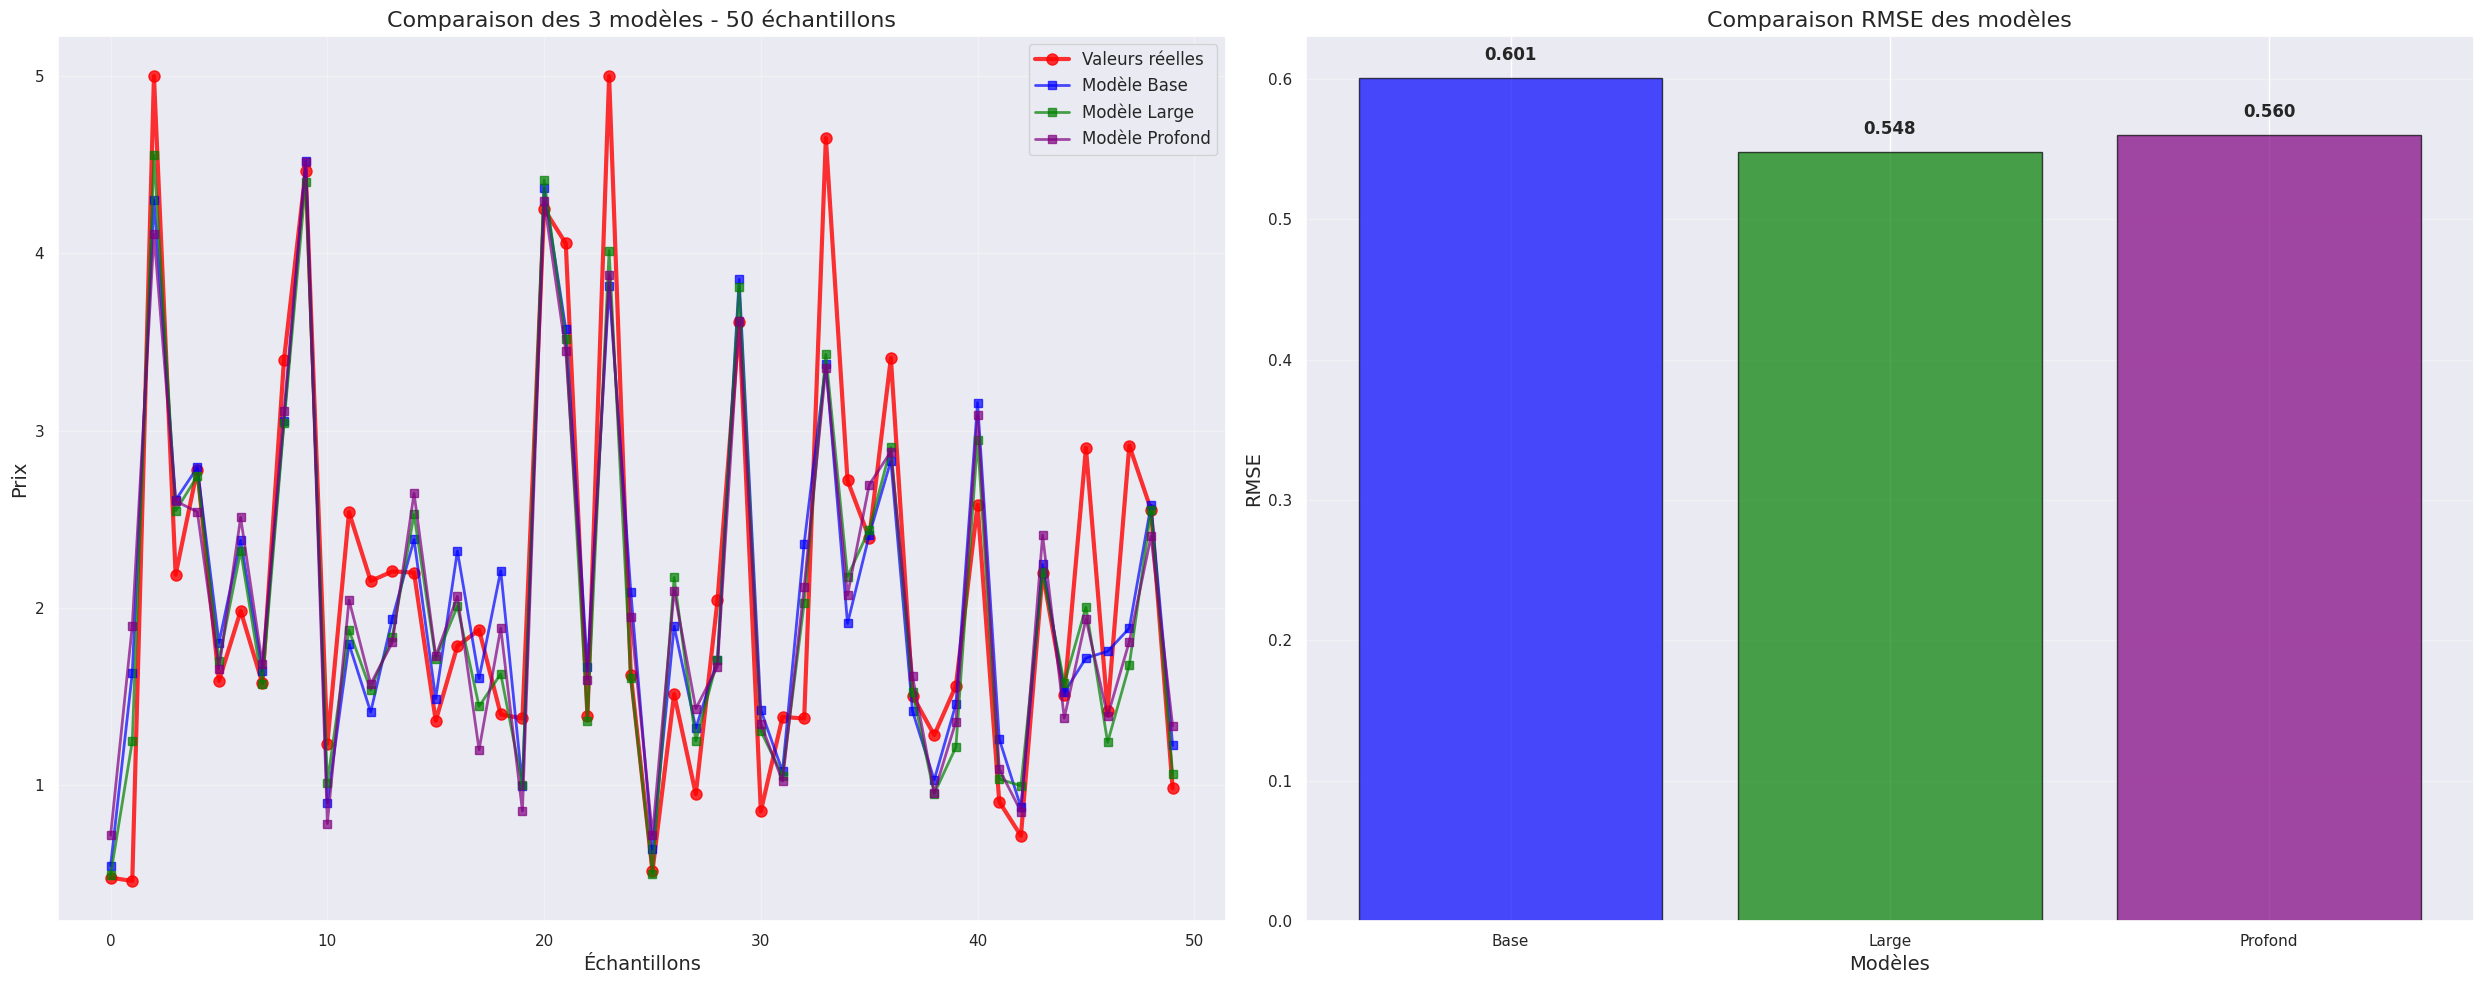

=== COMPARAISON DES MODÈLES ===
 Modèle    MSE   RMSE
   Base 0.3607 0.6005
  Large 0.3003 0.5480
Profond 0.3137 0.5601


In [ ]:
# Visualisation comparative des 3 modèles
plt.figure(figsize=(25, 10))

# Supposons que vous avez y_pred_base, y_pred_large, y_pred_profond
models = ['Base', 'Large', 'Profond']
predictions = [y_pred_base, y_pred_large, y_pred_profond]
colors = ['blue', 'green', 'purple']

# Graphique 1: Comparaison sur 50 échantillons
plt.subplot(1, 2, 1)
plt.plot(Y_test[:50], label="Valeurs réelles", marker='o', alpha=0.8, linewidth=3, color='red', markersize=8)

for i, (model, pred, color) in enumerate(zip(models, predictions, colors)):
    plt.plot(pred[:50], label=f"Modèle {model}", marker='s', alpha=0.7, linewidth=2, color=color)

plt.title('Comparaison des 3 modèles - 50 échantillons', fontsize=16)
plt.xlabel('Échantillons', fontsize=14)
plt.ylabel('Prix', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Graphique 2: Métriques comparatives
plt.subplot(1, 2, 2)
mse_scores = [mean_squared_error(Y_test, pred) for pred in predictions]
rmse_scores = [np.sqrt(mse) for mse in mse_scores]

x_pos = range(len(models))
bars = plt.bar(x_pos, rmse_scores, color=colors, alpha=0.7, edgecolor='black')
plt.xlabel('Modèles', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.title('Comparaison RMSE des modèles', fontsize=16)
plt.xticks(x_pos, models)
plt.grid(True, alpha=0.3, axis='y')

# Ajouter les valeurs sur les barres
for bar, score in zip(bars, rmse_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{score:.3f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Tableau récapitulatif
print("=== COMPARAISON DES MODÈLES ===")
comparison_data = {
    'Modèle': models,
    'MSE': [f"{mse:.4f}" for mse in mse_scores],
    'RMSE': [f"{rmse:.4f}" for rmse in rmse_scores]
}
comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

## **<center>Exercice 2 - Classification d'images</center>**

L'ensemble de données CIFAR-10 comprend 60 000 photos réparties en 10 classes (d'où le nom CIFAR-10). Les classes incluent des objets tels que des avions, des automobiles, des oiseaux, des chats, etc. L'ensemble de données est divisé de manière standard, où 50 000 images sont utilisées pour entraîner un modèle et les 10 000 autres pour évaluer ses performances.

Les photos sont en couleur avec des composantes rouges, vertes et bleues, mais de petite taille mesurant des carrés de 32 x 32 pixels.

Il existe un concours Kaggle qui utilise les données CIFAR-10. C'est un bon endroit pour rejoindre la discussion sur le développement de nouveaux modèles pour le problème et choisir des modèles et des scripts comme point de départ.

### **Acquisition des données**

L'ensemble de données CIFAR-10 peut facilement être importé de la librairie Keras à l'aide de la fonction cifar10.load_data() pour les stocker dans le répertoire <repertoire courant>/.keras/datasets . Cet ensemble de données est volumineux à 163 mégaoctets, son téléchargement peut donc prendre quelques minutes.

In [ ]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot
import tensorflow as tf

# Nettoyer la session TensorFlow pour éviter les conflits
tf.keras.backend.clear_session()

# Acquisition des données
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

### **Analyse des données**

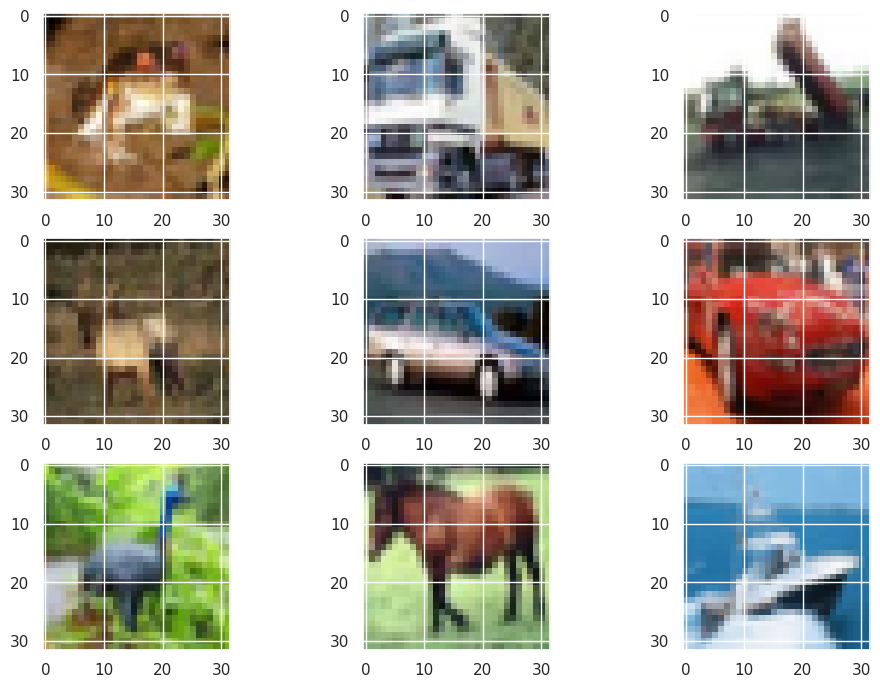

In [ ]:
# Analyse des données - affichage d'un sous-ensemble
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_train[i])
pyplot.show()

### **Normalisation des données**

Les valeurs de pixel des images sont comprises entre 0 et 255 pour chacun des canaux rouge, vert et bleu.

Parce que les valeurs d'entrée sont bien comprises, nous pouvons facilement normaliser la plage de 0 à 1 en divisant chaque valeur par l'observation maximale qui est de 255.

In [ ]:
# Normalisation des données X_train et X_test from 0-255 to 0.0-1.0
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [ ]:
# One hot encoding de la variable de sortie
y_train_cifar = to_categorical(y_train, 10)
y_test_cifar = to_categorical(y_test, 10)
num_classes = y_test_cifar.shape[1]

print(f"Nombre de classes: {num_classes}")
print(f"Forme X_train: {X_train.shape}")
print(f"Forme y_train: {y_train_cifar.shape}")

Nombre de classes: 10
Forme X_train: (50000, 32, 32, 3)
Forme y_train: (50000, 10)


### **Variables cibles**

Les variables de sortie sont définies comme un vecteur d'entiers de 0 à 1 pour chaque classe.

Nous pouvons utiliser un "one hot encoding" pour les transformer en une matrice binaire afin de modéliser au mieux le problème de classification. Nous savons qu'il existe 10 classes pour ce problème, et la matrice binaire aaura donc une largeur de 10.

### **Réseau de neurones à convolution (CNN)**

Pour résoudre CIFAR-10, nous pouvons commencer par importer toutes les classes et fonctions dont nous aurons besoin

In [ ]:
num_classes

10

**Construction du modèle**

In [ ]:
# Construction du modèle - Nouvelle instance propre
cifar10_model = tf.keras.models.Sequential()

# 1ère couche convolutive
cifar10_model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32,32,3]))

# 2ème couche convolutive
cifar10_model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

# 3ème couche Max Pooling
cifar10_model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

# 4ème couche convolutive
cifar10_model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

# 5ème couche convolutive
cifar10_model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

# 6ème couche Max Pooling
cifar10_model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

# Couche d'applatissement
cifar10_model.add(tf.keras.layers.Flatten())

# Couche Dropout
cifar10_model.add(tf.keras.layers.Dropout(0.5, noise_shape=None, seed=None))

# Couche entièrement connectée avec 128 unités
cifar10_model.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Couche de sortie (10 classes, activation softmax pour multi-classes)
cifar10_model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

# Affichage de la description du modèle
cifar10_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591,274 (2.26 MB)

 Trainable params: 591,274 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compilation du modèle (utilisation de categorical_crossentropy car on a fait du one-hot encoding)
cifar10_model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["categorical_accuracy"])

In [ ]:
# Entraînement du modèle pour 15 epochs
history = cifar10_model.fit(X_train, y_train_cifar, epochs=15, batch_size=32, validation_data=(X_test, y_test_cifar), verbose=1)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 262s 166ms/step - categorical_accuracy: 0.3700 - loss: 1.7140 - val_categorical_accuracy: 0.6181 - val_loss: 1.0669
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 257s 165ms/step - categorical_accuracy: 0.6224 - loss: 1.0568 - val_categorical_accuracy: 0.7043 - val_loss: 0.8525
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 277s 174ms/step - categorical_accuracy: 0.6990 - loss: 0.8598 - val_categorical_accuracy: 0.7330 - val_loss: 0.7797
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 320s 173ms/step - categorical_accuracy: 0.7372 - loss: 0.7449 - val_categorical_accuracy: 0.7460 - val_loss: 0.7261
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 279s 178ms/step - categorical_accuracy: 0.7581 - loss: 0.6787 - val_categorical_accuracy: 0.7648 - val_loss: 0.6856
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 317s 175ms/step - categorical_accuracy: 0.7834 - loss: 0.6103 - val_categorical_accuracy: 0.7696 - val_loss: 0.6757
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 316s 172ms

In [ ]:
# Évaluation de la performance du modèle
test_loss, test_accuracy = cifar10_model.evaluate(X_test, y_test_cifar)
print(f"Test accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - categorical_accuracy: 0.7798 - loss: 0.7192
Test accuracy: 0.7767999768257141


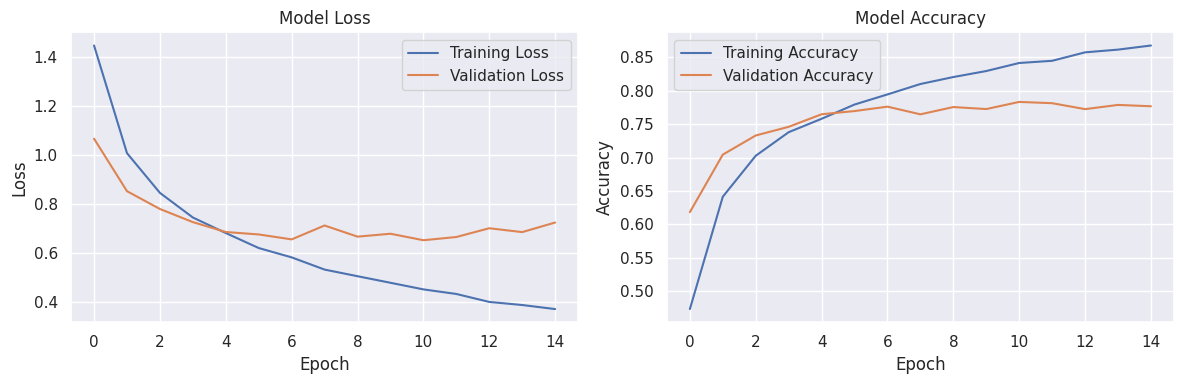

In [ ]:
# Affichage des courbes d'apprentissage
pyplot.figure(figsize=(12, 4))

pyplot.subplot(1, 2, 1)
pyplot.plot(history.history['loss'], label='Training Loss')
pyplot.plot(history.history['val_loss'], label='Validation Loss')
pyplot.title('Model Loss')
pyplot.xlabel('Epoch')
pyplot.ylabel('Loss')
pyplot.legend()

pyplot.subplot(1, 2, 2)
pyplot.plot(history.history['categorical_accuracy'], label='Training Accuracy')
pyplot.plot(history.history['val_categorical_accuracy'], label='Validation Accuracy')
pyplot.title('Model Accuracy')
pyplot.xlabel('Epoch')
pyplot.ylabel('Accuracy')
pyplot.legend()

pyplot.tight_layout()
pyplot.show()